## Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the data

In [2]:
insurance_dataset = pd.read_csv("insurance.csv")
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# 1.Data Analysis

In [3]:
# number of rows and columns

insurance_dataset.shape

(1338, 7)

In [4]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Categorical features
* sex
* smoker
* region

## Any Missing values?

In [5]:
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Statistical measures (Summary of Dataset)


In [6]:
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Distribution of Age

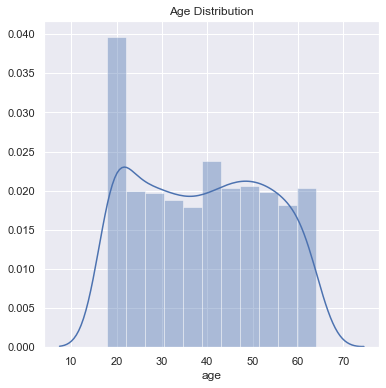

In [7]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

#### More number of peopl ein our dataset are in age 18 - 23

In [8]:
insurance_dataset.groupby(insurance_dataset['age'])['age'].count()

age
18    69
19    68
20    29
21    28
22    28
23    28
24    28
25    28
26    28
27    28
28    28
29    27
30    27
31    27
32    26
33    26
34    26
35    25
36    25
37    25
38    25
39    25
40    27
41    27
42    27
43    27
44    27
45    29
46    29
47    29
48    29
49    28
50    29
51    29
52    29
53    28
54    28
55    26
56    26
57    26
58    25
59    25
60    23
61    23
62    23
63    23
64    22
Name: age, dtype: int64

## Distribution of BMI

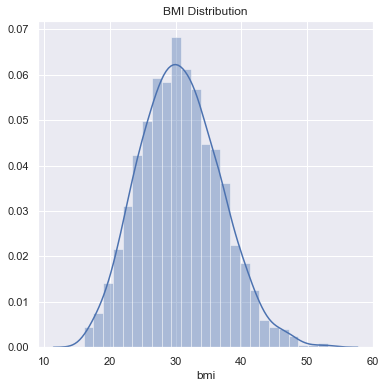

In [9]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

#### As we see above the data is normally distrubuted. The normal BMI range is 18.5 to 24.9. As we see above, most of the people are overweight. This might increase the insurance cost

In [10]:
insurance_dataset.groupby(insurance_dataset['bmi'])['bmi'].count()

bmi
15.960    1
16.815    2
17.195    1
17.290    3
17.385    1
         ..
48.070    1
49.060    1
50.380    1
52.580    1
53.130    1
Name: bmi, Length: 548, dtype: int64

## Distribution of Number of Children 

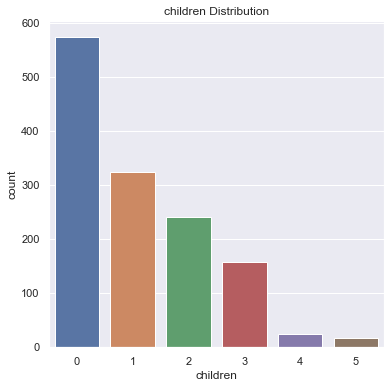

In [11]:
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_dataset)
plt.title('children Distribution')
plt.show()

#### As we see in the above count plot, we see many people who have 0 number of kids

In [12]:
insurance_dataset.groupby(insurance_dataset['children'])['children'].count()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

## Distribution of Sex

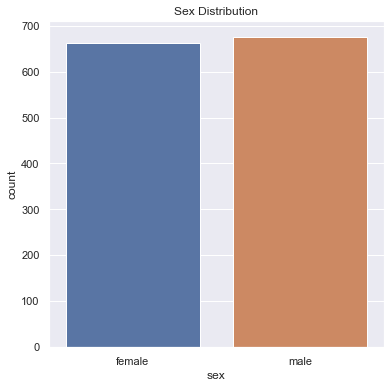

In [13]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

#### As seen above, we have almost equal number of males and females in our dataset

In [14]:
insurance_dataset.groupby(insurance_dataset['sex'])['sex'].count()

sex
female    662
male      676
Name: sex, dtype: int64

## Distribution of Smoker

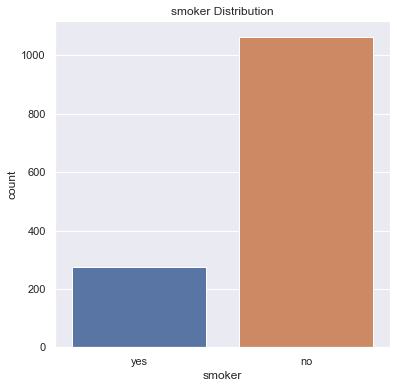

In [15]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title('smoker Distribution')
plt.show()

In [16]:
insurance_dataset.groupby(insurance_dataset['smoker'])['smoker'].count()

smoker
no     1064
yes     274
Name: smoker, dtype: int64

#### As we see above, the number of non-smokers are more than number of smokers

## Distribution of Region

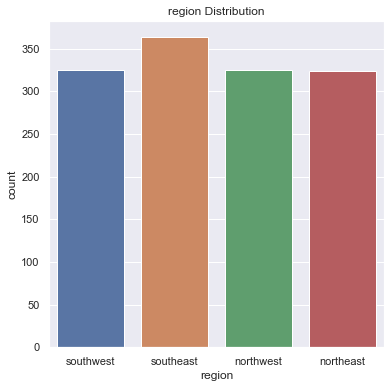

In [17]:
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_dataset)
plt.title('region Distribution')
plt.show()

#### As we see baove, the people are almost eually distributed across all regions

In [18]:
insurance_dataset.groupby(insurance_dataset['region'])['region'].count()

region
northeast    324
northwest    325
southeast    364
southwest    325
Name: region, dtype: int64

## Distribution of Charges

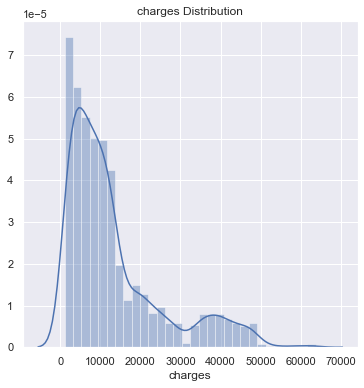

In [19]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['charges'])
plt.title('charges Distribution')
plt.show()

#### This is a right skewed data

## Transformation

#### We have the following Categorical features. WE need to encode them to pass through a ML algorithm
* sex
* smoker
* region

In [20]:
#1.encoding sex column
insurance_dataset.replace({'sex':{'male':0,'female':1}}, inplace=True)

#2.encoding 'smoker' column
insurance_dataset.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

#3.encoding 'region' column
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

In [21]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


## Splitting the Features and Target

In [22]:
X = insurance_dataset.drop(columns='charges', axis=1)
Y = insurance_dataset['charges']

## Splitting the data into Training data & Testing Data

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [25]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


## Model Training

### Linear Regression Model

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# loading the Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

## Model Evaluation

In [28]:
# prediction on training data
training_data_prediction =regressor.predict(X_train)

In [29]:
# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared vale : ', r2_train)

R squared vale :  0.751505643411174


#### The R2 is lesser

In [30]:
# prediction on test data
test_data_prediction =regressor.predict(X_test)

In [32]:
# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared value : ', r2_test)

R squared value :  0.7447273869684077


### Building a Predictive System

In [33]:

input_data = (31,1,25.74,0,1,0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[3760.0805765]
The insurance cost is USD  3760.0805764960496


C:\Users\rramy\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
